# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_price = btc_response.json()['data']['1']['quotes']['CAD']['price']
print(f"Current btc price {btc_price}")

# Fetch current ETH pri
eth_response = requests.get(eth_url)
eth_price = eth_response.json()['data']['1027']['quotes']['CAD']['price']
print(f"Current eth price {eth_price}")

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Current btc price 51718.6614
Current eth price 3624.582444
The current value of your 1.2 BTC is $62062.39
The current value of your 5.3 ETH is $19210.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [19]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [6]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [13]:
# Format current date as ISO format
end_date = pd.Timestamp("2022-03-16", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2018-03-16", tz="America/New_York").isoformat()
print(end_date)
# end_date = pd.Timestamp.now(tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
agg_ticker_data = api.get_bars(
    tickers,
    timeframe=tradeapi.TimeFrame.Day,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
agg_ticker_data.tail()

2022-03-16T00:00:00-04:00


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-02-28 05:00:00+00:00,110.040,110.43,110.020,110.36,15026077,34673,110.285559,AGG
2022-03-01 05:00:00+00:00,110.600,111.17,110.570,110.82,14248500,39215,110.836369,AGG
2022-03-02 05:00:00+00:00,110.310,110.38,109.460,109.49,8489288,27605,109.930996,AGG
2022-03-03 05:00:00+00:00,109.785,110.00,109.650,109.86,15479351,47775,109.822045,AGG
2022-03-04 05:00:00+00:00,110.380,110.55,110.225,110.30,8116629,26863,110.381556,AGG


In [14]:
# Set the tickers
tickers = ["SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
spy_ticker_data = api.get_bars(
    tickers,
    tradeapi.TimeFrame.Day,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
spy_ticker_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-03-16 04:00:00+00:00,274.45,275.3900,274.14,274.22,101998960,240467,274.568938,SPY
2018-03-19 04:00:00+00:00,273.34,274.3957,268.62,270.61,109335542,432142,270.752850,SPY
2018-03-20 04:00:00+00:00,270.91,271.6700,270.18,270.93,60267376,209741,270.907252,SPY
2018-03-21 04:00:00+00:00,270.88,273.2700,270.19,270.40,78884438,330625,271.404380,SPY
2018-03-22 04:00:00+00:00,267.83,268.8700,263.36,263.71,149493729,577825,266.129101,SPY
...,...,...,...,...,...,...,...,...
2022-02-28 05:00:00+00:00,432.09,438.2000,430.70,436.63,139641894,1237593,434.582082,SPY
2022-03-01 05:00:00+00:00,435.10,437.1700,427.21,429.98,132857631,1350987,431.675336,SPY
2022-03-02 05:00:00+00:00,432.42,439.7200,431.57,437.89,113504091,1192990,436.227698,SPY


In [16]:
ticker_data= pd.concat([agg_ticker_data, spy_ticker_data], 
    keys=['AGG', "SPY"],
    axis=1,
    join='inner'
)
ticker_data

AGG                                       \
                              open      high      low   close    volume   
timestamp                                                                 
2018-03-16 04:00:00+00:00  106.620  106.7199  106.600  106.70   2552666   
2018-03-19 04:00:00+00:00  106.560  106.7400  106.530  106.59   2263306   
2018-03-20 04:00:00+00:00  106.440  106.5100  106.400  106.42   3000759   
2018-03-21 04:00:00+00:00  106.320  106.4800  106.080  106.41   2994423   
2018-03-22 04:00:00+00:00  106.670  106.8000  106.490  106.61   3334408   
...                            ...       ...      ...     ...       ...   
2022-02-28 05:00:00+00:00  110.040  110.4300  110.020  110.36  15026077   
2022-03-01 05:00:00+00:00  110.600  111.1700  110.570  110.82  14248500   
2022-03-02 05:00:00+00:00  110.310  110.3800  109.460  109.49   8489288   
2022-03-03 05:00:00+00:00  109.785  110.0000  109.650  109.86  15479351   
2022-03-04 05:00:00+00:00  110.380  110.5500  110.225  110.30   8116629   

                                                             SPY            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2018-03-16 04:00:00+00:00        9573  106.665519    AGG  274.45  275.3900   
2018-03-19 04:00:00+00:00       10795  106.656168    AGG  273.34  274.3957   
2018-03-20 04:00:00+00:00       10207  106.449403    AGG  270.91  271.6700   
2018-03-21 04:00:00+00:00       13898  106.284005    AGG  270.88  273.2700   
2018-03-22 04:00:00+00:00       13773  106.616043    AGG  267.83  268.8700   
...                               ...         ...    ...     ...       ...   
2022-02-28 05:00:00+00:00       34673  110.285559    AGG  432.09  438.2000   
2022-03-01 05:00:00+00:00       39215  110.836369    AGG  435.10  437.1700   
2022-03-02 05:00:00+00:00       27605  109.930996    AGG  432.42  439.7200   
2022-03-03 05:00:00+00:00       47775  109.822045    AGG  440.39  441.1100   
2022-03-04 05:00:00+00:00       26863  110.381556    AGG  432.03  433.3700   

                                                                              \
                              low   close     volume trade_count        vwap   
timestamp                                                                      
2018-03-16 04:00:00+00:00  274.14  274.22  101998960      240467  274.568938   
2018-03-19 04:00:00+00:00  268.62  270.61  109335542      432142  270.752850   
2018-03-20 04:00:00+00:00  270.18  270.93   60267376      209741  270.907252   
2018-03-21 04:00:00+00:00  270.19  270.40   78884438      330625  271.404380   
2018-03-22 04:00:00+00:00  263.36  263.71  149493729      577825  266.129101   
...                           ...     ...        ...         ...         ...   
2022-02-28 05:00:00+00:00  430.70  436.63  139641894     1237593  434.582082   
2022-03-01 05:00:00+00:00  427.21  429.98  132857631     1350987  431.675336   
2022-03-02 05:00:00+00:00  431.57  437.89  113504091     1192990  436.227698   
2022-03-03 05:00:00+00:00  433.80  435.71   99816064      993442  436.937317   
2022-03-04 05:00:00+00:00  427.88  432.17  108964209     1043164  430.912347   

                                  
                          symbol  
timestamp                         
2018-03-16 04:00:00+00:00    SPY  
2018-03-19 04:00:00+00:00    SPY  
2018-03-20 04:00:00+00:00    SPY  
2018-03-21 04:00:00+00:00    SPY  
2018-03-22 04:00:00+00:00    SPY  
...                          ...  
2022-02-28 05:00:00+00:00    SPY  
2022-03-01 05:00:00+00:00    SPY  
2022-03-02 05:00:00+00:00    SPY  
2022-03-03 05:00:00+00:00    SPY  
2022-03-04 05:00:00+00:00    SPY  

[1000 rows x 16 columns]

In [17]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close'][-1]
spy_close_price = ticker_data['SPY']['close'][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $110.3
Current SPY closing price: $432.17


In [20]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21608.50
The current value of your 200 AGG shares is $22060.00


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
consolidated_assets = {
    'amount': { 
        'crypto': my_btc_value + my_eth_value,
        'shares':  my_spy_value + my_agg_value
    },
}

# Create savings DataFrame
df_savings = pd.DataFrame(consolidated_assets)

# Display savings DataFrame
df_savings

,amount
crypto,81272.680633
shares,43668.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

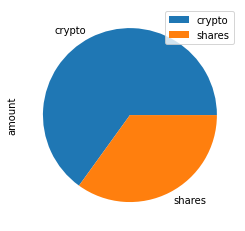

In [22]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()
# Testing data
# total_savings = 1000

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough savings for emergency")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached to your emergency fund goal")
else:
    print(f"You still need ${emergency_fund - total_savings :0.2F} to reach your emergency fund")

Congratulations, you have enough savings for emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
agg_stock_data = api.get_bars(
    ["AGG"],
    tradeapi.TimeFrame.Day,
    start=start_date,
    end=end_date,
    limit=1000,
).df

spy_stock_data = api.get_bars(
    ["SPY"],
    tradeapi.TimeFrame.Day,
    start=start_date,
    end=end_date,
    limit=1000,
).df

df_stock_data= pd.concat([agg_ticker_data, spy_ticker_data], 
    keys=['AGG', "SPY"],
    axis=1,
    join='inner'
)
df_stock_data


AGG                                       \
                              open      high      low   close    volume   
timestamp                                                                 
2018-03-16 04:00:00+00:00  106.620  106.7199  106.600  106.70   2552666   
2018-03-19 04:00:00+00:00  106.560  106.7400  106.530  106.59   2263306   
2018-03-20 04:00:00+00:00  106.440  106.5100  106.400  106.42   3000759   
2018-03-21 04:00:00+00:00  106.320  106.4800  106.080  106.41   2994423   
2018-03-22 04:00:00+00:00  106.670  106.8000  106.490  106.61   3334408   
...                            ...       ...      ...     ...       ...   
2022-02-28 05:00:00+00:00  110.040  110.4300  110.020  110.36  15026077   
2022-03-01 05:00:00+00:00  110.600  111.1700  110.570  110.82  14248500   
2022-03-02 05:00:00+00:00  110.310  110.3800  109.460  109.49   8489288   
2022-03-03 05:00:00+00:00  109.785  110.0000  109.650  109.86  15479351   
2022-03-04 05:00:00+00:00  110.380  110.5500  110.225  110.30   8116629   

                                                             SPY            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2018-03-16 04:00:00+00:00        9573  106.665519    AGG  274.45  275.3900   
2018-03-19 04:00:00+00:00       10795  106.656168    AGG  273.34  274.3957   
2018-03-20 04:00:00+00:00       10207  106.449403    AGG  270.91  271.6700   
2018-03-21 04:00:00+00:00       13898  106.284005    AGG  270.88  273.2700   
2018-03-22 04:00:00+00:00       13773  106.616043    AGG  267.83  268.8700   
...                               ...         ...    ...     ...       ...   
2022-02-28 05:00:00+00:00       34673  110.285559    AGG  432.09  438.2000   
2022-03-01 05:00:00+00:00       39215  110.836369    AGG  435.10  437.1700   
2022-03-02 05:00:00+00:00       27605  109.930996    AGG  432.42  439.7200   
2022-03-03 05:00:00+00:00       47775  109.822045    AGG  440.39  441.1100   
2022-03-04 05:00:00+00:00       26863  110.381556    AGG  432.03  433.3700   

                                                                              \
                              low   close     volume trade_count        vwap   
timestamp                                                                      
2018-03-16 04:00:00+00:00  274.14  274.22  101998960      240467  274.568938   
2018-03-19 04:00:00+00:00  268.62  270.61  109335542      432142  270.752850   
2018-03-20 04:00:00+00:00  270.18  270.93   60267376      209741  270.907252   
2018-03-21 04:00:00+00:00  270.19  270.40   78884438      330625  271.404380   
2018-03-22 04:00:00+00:00  263.36  263.71  149493729      577825  266.129101   
...                           ...     ...        ...         ...         ...   
2022-02-28 05:00:00+00:00  430.70  436.63  139641894     1237593  434.582082   
2022-03-01 05:00:00+00:00  427.21  429.98  132857631     1350987  431.675336   
2022-03-02 05:00:00+00:00  431.57  437.89  113504091     1192990  436.227698   
2022-03-03 05:00:00+00:00  433.80  435.71   99816064      993442  436.937317   
2022-03-04 05:00:00+00:00  427.88  432.17  108964209     1043164  430.912347   

                                  
                          symbol  
timestamp                         
2018-03-16 04:00:00+00:00    SPY  
2018-03-19 04:00:00+00:00    SPY  
2018-03-20 04:00:00+00:00    SPY  
2018-03-21 04:00:00+00:00    SPY  
2018-03-22 04:00:00+00:00    SPY  
...                          ...  
2022-02-28 05:00:00+00:00    SPY  
2022-03-01 05:00:00+00:00    SPY  
2022-03-02 05:00:00+00:00    SPY  
2022-03-03 05:00:00+00:00    SPY  
2022-03-04 05:00:00+00:00    SPY  

[1000 rows x 16 columns]

In [32]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500
weights = [0.4,0.6]
# Configure a Monte Carlo simulation to forecast three years daily returns
MC = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights=weights,
    num_trading_days = 252*30
)

In [33]:
# Printing the simulation input data
MC.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2018-03-16 04:00:00+00:00  106.62  106.7199  106.60  106.70  2552666   
2018-03-19 04:00:00+00:00  106.56  106.7400  106.53  106.59  2263306   
2018-03-20 04:00:00+00:00  106.44  106.5100  106.40  106.42  3000759   
2018-03-21 04:00:00+00:00  106.32  106.4800  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.8000  106.49  106.61  3334408   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2018-03-16 04:00:00+00:00        9573  106.665519    AGG          NaN  274.45   
2018-03-19 04:00:00+00:00       10795  106.656168    AGG    -0.001031  273.34   
2018-03-20 04:00:00+00:00       10207  106.449403    AGG    -0.001595  270.91   
2018-03-21 04:00:00+00:00       13898  106.284005    AGG    -0.000094  270.88   
2018-03-22 04:00:00+00:00       13773  106.616043    AGG     0.001880  267.83   

                                                                            \
                               high     low   close     volume trade_count   
timestamp                                                                    
2018-03-16 04:00:00+00:00  275.3900  274.14  274.22  101998960      240467   
2018-03-19 04:00:00+00:00  274.3957  268.62  270.61  109335542      432142   
2018-03-20 04:00:00+00:00  271.6700  270.18  270.93   60267376      209741   
2018-03-21 04:00:00+00:00  273.2700  270.19  270.40   78884438      330625   
2018-03-22 04:00:00+00:00  268.8700  263.36  263.71  149493729      577825   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2018-03-16 04:00:00+00:00  274.568938    SPY          NaN  
2018-03-19 04:00:00+00:00  270.752850    SPY    -0.013165  
2018-03-20 04:00:00+00:00  270.907252    SPY     0.001183  
2018-03-21 04:00:00+00:00  271.404380    SPY    -0.001956  
2018-03-22 04:00:00+00:00  266.129101    SPY    -0.024741

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/guruprasadmulay/Desktop/Bootcamp/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995221,1.004161,0.996972,0.999675,0.987399,1.010278,1.004453,1.006072,0.992902,1.007212,...,0.998239,0.992396,1.008987,1.013694,1.000182,1.000818,0.996219,1.005945,0.980114,0.995505
2,1.006318,1.008452,0.985010,1.003758,0.995864,1.029157,1.014176,1.010981,1.001314,1.011601,...,1.008776,0.997598,1.008539,1.029310,0.997722,0.983138,1.001628,1.018664,0.985127,0.996512
3,1.003332,1.007275,0.990479,0.999831,0.999210,1.041628,1.024685,1.007067,0.982335,1.011967,...,1.002002,1.000825,1.006213,1.027679,1.002350,0.991852,0.998781,1.027424,0.987511,0.990737
4,1.005839,1.004702,0.988289,0.995376,0.998662,1.024650,1.021997,1.014887,0.979686,1.008456,...,1.014865,1.004985,1.015326,1.038640,1.016277,0.996596,1.007796,1.032967,0.987211,0.979924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.180042,11.070547,10.767731,11.057429,5.490363,15.016490,7.941133,12.830072,29.097876,38.617794,...,20.149840,9.098212,12.998846,11.893795,5.586623,7.169693,1.894079,6.718976,8.315304,11.195930
7557,9.016059,11.129929,10.740556,11.019164,5.469489,14.962520,8.004688,12.839814,28.643480,38.697608,...,20.223706,9.116248,12.695950,11.999238,5.528773,7.104277,1.885467,6.724842,8.423957,11.283777
7558,9.017503,11.058590,10.641751,10.853359,5.465449,14.924867,7.960751,12.666131,28.538957,38.773705,...,20.157497,9.127768,12.683456,12.019124,5.451357,7.148012,1.858756,6.694498,8.404967,11.424575
7559,9.087903,11.126773,10.675868,10.932710,5.476889,15.084194,8.011347,12.697439,28.666332,38.433030,...,20.168081,9.088293,12.658530,11.950243,5.479116,7.137407,1.887444,6.751922,8.409513,11.409689


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

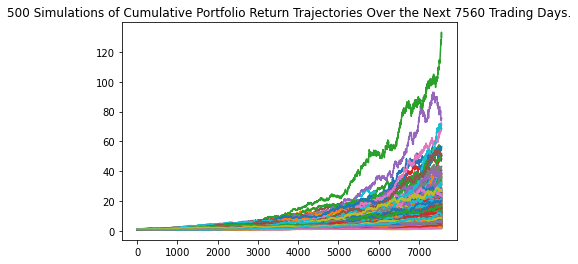

In [35]:
# Plot simulation outcomes
MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

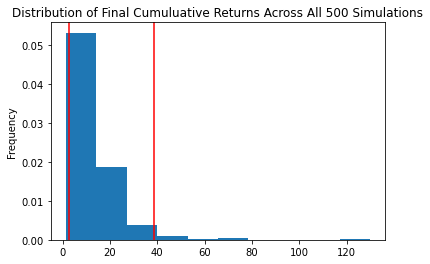

In [36]:
# Plot probability distribution and confidence intervals
MC.plot_distribution()

### Retirement Analysis

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC.summarize_cumulative_return()
# Print summary statistics
summary_stats

count           500.000000
mean             13.369106
std              11.193027
min               1.274751
25%               6.958052
50%              10.673002
75%              15.875196
max             129.966011
95% CI Lower      2.675511
95% CI Upper     38.551856
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53510.22 and $771037.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [39]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $80265.33 and $1156555.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights=weights,
    num_trading_days = 252*5
)

In [41]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/guruprasadmulay/Desktop/Bootcamp/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008369,0.997694,1.006156,0.998885,1.002931,0.998745,1.001755,0.992597,0.998599,1.002412,...,1.005647,1.005425,0.989498,1.000709,1.002197,0.998410,0.988398,1.010157,0.991140,1.000599
2,0.993618,0.992060,1.006381,1.004789,1.012955,0.996142,0.993261,1.000617,1.010258,1.010849,...,1.032189,1.009596,0.979480,1.009315,1.009070,0.990034,0.993720,1.020220,1.004389,1.010111
3,0.991092,0.973731,1.009719,1.019840,1.023482,0.984668,0.993472,1.003833,1.012596,1.017577,...,1.032093,1.007123,0.991664,1.007593,0.995398,0.999625,0.984098,1.028523,0.997257,1.010596
4,1.005550,0.970720,1.021514,1.011773,1.019199,0.997591,0.987063,0.999778,1.019446,1.008939,...,1.019931,1.004356,0.988698,1.015834,0.996400,1.005556,0.983925,1.040559,0.999170,1.000998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.252739,0.720118,1.974365,1.416714,1.807629,1.167061,2.018110,2.066497,2.750697,1.719773,...,1.387319,1.845936,1.309923,1.440125,1.665487,1.412974,0.991683,1.395933,1.524582,0.967585
1257,1.259767,0.716148,1.976993,1.430243,1.815798,1.158311,1.998176,2.043591,2.751033,1.717121,...,1.399220,1.870094,1.319396,1.449527,1.659717,1.411647,0.984201,1.373434,1.526661,0.954972
1258,1.264653,0.723241,1.961247,1.429279,1.813001,1.158415,1.988865,2.049429,2.732163,1.706951,...,1.383825,1.885967,1.312928,1.442249,1.655391,1.421723,0.994285,1.378825,1.544532,0.945073
1259,1.269158,0.726130,1.958374,1.417577,1.826493,1.157674,2.001336,2.039985,2.763270,1.720160,...,1.391861,1.866979,1.306009,1.425119,1.669186,1.446575,0.987987,1.378047,1.572677,0.937181


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

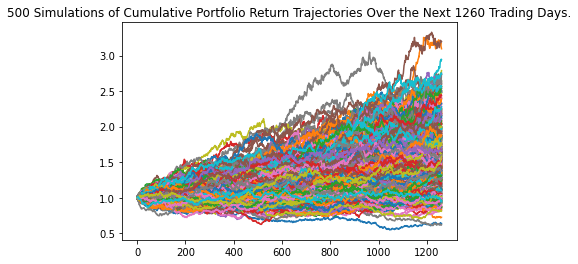

In [42]:
# Plot simulation outcomes
MC_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

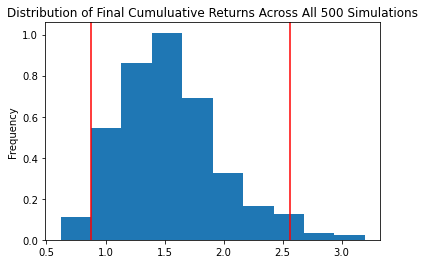

In [43]:
# Plot probability distribution and confidence intervals
MC_five_years.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_five_years_stats = MC_five_years.summarize_cumulative_return()
# Print summary statistics
MC_five_years_stats

count           500.000000
mean              1.550205
std               0.425827
min               0.619163
25%               1.257601
50%               1.511227
75%               1.758822
max               3.195886
95% CI Lower      0.875669
95% CI Upper      2.565199
Name: 1260, dtype: float64

In [45]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_five_years_stats[8]*initial_investment,2)
ci_upper_five = round(MC_five_years_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52540.11 and $153911.97


### Ten Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_ten_years.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2018-03-16 04:00:00+00:00  106.62  106.7199  106.60  106.70  2552666   
2018-03-19 04:00:00+00:00  106.56  106.7400  106.53  106.59  2263306   
2018-03-20 04:00:00+00:00  106.44  106.5100  106.40  106.42  3000759   
2018-03-21 04:00:00+00:00  106.32  106.4800  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.8000  106.49  106.61  3334408   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2018-03-16 04:00:00+00:00        9573  106.665519    AGG          NaN  274.45   
2018-03-19 04:00:00+00:00       10795  106.656168    AGG    -0.001031  273.34   
2018-03-20 04:00:00+00:00       10207  106.449403    AGG    -0.001595  270.91   
2018-03-21 04:00:00+00:00       13898  106.284005    AGG    -0.000094  270.88   
2018-03-22 04:00:00+00:00       13773  106.616043    AGG     0.001880  267.83   

                                                                            \
                               high     low   close     volume trade_count   
timestamp                                                                    
2018-03-16 04:00:00+00:00  275.3900  274.14  274.22  101998960      240467   
2018-03-19 04:00:00+00:00  274.3957  268.62  270.61  109335542      432142   
2018-03-20 04:00:00+00:00  271.6700  270.18  270.93   60267376      209741   
2018-03-21 04:00:00+00:00  273.2700  270.19  270.40   78884438      330625   
2018-03-22 04:00:00+00:00  268.8700  263.36  263.71  149493729      577825   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2018-03-16 04:00:00+00:00  274.568938    SPY          NaN  
2018-03-19 04:00:00+00:00  270.752850    SPY    -0.013165  
2018-03-20 04:00:00+00:00  270.907252    SPY     0.001183  
2018-03-21 04:00:00+00:00  271.404380    SPY    -0.001956  
2018-03-22 04:00:00+00:00  266.129101    SPY    -0.024741

In [47]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/guruprasadmulay/Desktop/Bootcamp/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997468,1.012729,1.006925,0.994456,1.014963,1.004294,1.006394,1.006337,1.011525,1.016470,...,0.990284,1.003044,0.999109,0.996034,1.012963,0.992705,1.007506,1.011446,0.992495,0.991938
2,1.001168,1.001199,1.006572,0.998051,1.011212,1.004413,0.992289,1.016120,1.014514,1.010523,...,0.996912,1.001268,0.999962,0.985885,1.021057,1.002157,1.012006,1.009750,1.000833,0.994676
3,1.001405,0.996331,1.006325,0.999669,1.007873,1.015568,0.990545,1.019813,1.021451,1.026918,...,0.991917,0.999775,1.016726,0.984634,1.024387,0.990183,1.024157,1.025717,1.003206,0.998460
4,1.014827,0.995113,1.015997,1.004691,1.004153,1.020773,0.998237,1.015451,1.037285,1.025667,...,1.005201,1.003149,1.013332,0.993060,1.020671,0.993769,1.028795,1.014835,1.007223,0.983689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.286818,1.888830,2.252559,1.570212,4.133508,1.542172,1.826987,1.756422,1.451267,1.651209,...,2.569077,4.634275,1.712015,2.202351,2.839829,2.147786,3.266310,3.225427,2.151403,1.305668
2517,3.263399,1.877230,2.230040,1.566369,4.076796,1.556413,1.826686,1.769027,1.442875,1.645199,...,2.593825,4.587126,1.691603,2.220748,2.849514,2.174572,3.267963,3.194197,2.144690,1.301148
2518,3.279177,1.855041,2.230932,1.569164,4.041339,1.567766,1.827525,1.750457,1.437322,1.659010,...,2.603516,4.553175,1.685495,2.210000,2.822170,2.165059,3.265363,3.207990,2.162447,1.292622
2519,3.276211,1.875793,2.238155,1.569800,4.102249,1.569911,1.832070,1.730012,1.434569,1.637158,...,2.626287,4.522221,1.681825,2.219303,2.796867,2.159126,3.259849,3.263372,2.189401,1.282161


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

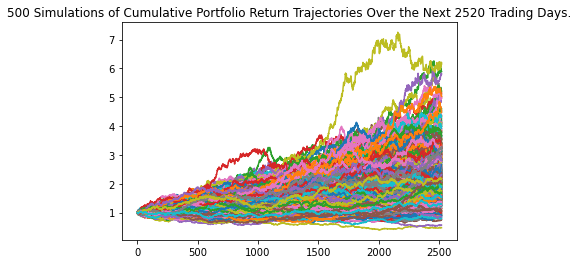

In [48]:
# Plot simulation outcomes
MC_ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

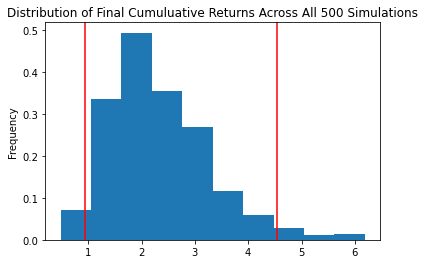

In [49]:
# Plot probability distribution and confidence intervals
MC_ten_years.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_ten_years_stats = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
MC_ten_years_stats

count           500.000000
mean              2.325996
std               0.936060
min               0.477013
25%               1.643453
50%               2.159250
75%               2.866259
max               6.189442
95% CI Lower      0.936405
95% CI Upper      4.549384
Name: 2520, dtype: float64

In [51]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_ten_years_stats[8]*initial_investment,2)
ci_upper_ten = round(MC_ten_years_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $56184.32 and $272963.06
